In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import_df = pd.read_csv('data/gummy_data.csv')

In [3]:
import_df.shape

(71, 9)

In [4]:
import_df.sample(5)

,pack,pear,carrot,grape,berry,apple,sum,3rd pack,box
4,5,2.0,3.0,4.0,0.0,0.0,9,NaN,2.0
54,55,2.0,0.0,4.0,2.0,0.0,8,NaN,6.0
16,17,0.0,3.0,2.0,2.0,1.0,8,NaN,3.0
23,24,1.0,4.0,1.0,1.0,1.0,8,NaN,3.0
28,29,1.0,2.0,3.0,1.0,1.0,8,NaN,4.0


In [5]:
df = import_df[import_df['sum'] != 0]

In [6]:
df.shape

(55, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pack      55 non-null     int64  
 1   pear      55 non-null     float64
 2   carrot    55 non-null     float64
 3   grape     55 non-null     float64
 4   berry     55 non-null     float64
 5   apple     55 non-null     float64
 6   sum       55 non-null     int64  
 7   3rd pack  3 non-null      object 
 8   box       55 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.3+ KB


In [8]:
df.describe()

,pack,pear,carrot,grape,berry,apple,sum,box
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,1.418182,1.927273,2.272727,1.254545,1.272727,8.145455,3.800000
std,16.02082,1.100352,1.168325,1.433134,0.927326,1.079344,0.355808,1.544404
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
25%,14.50000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,2.500000
50%,28.00000,1.000000,2.000000,2.000000,1.000000,1.000000,8.000000,4.000000
75%,41.50000,2.000000,3.000000,3.000000,2.000000,2.000000,8.000000,5.000000
max,55.00000,5.000000,4.000000,6.000000,3.000000,4.000000,9.000000,6.000000


In [26]:
gummies_per_pack = df['sum'].value_counts(normalize=True)
gummies_per_pack

8    0.854545
9    0.145455
Name: sum, dtype: float64

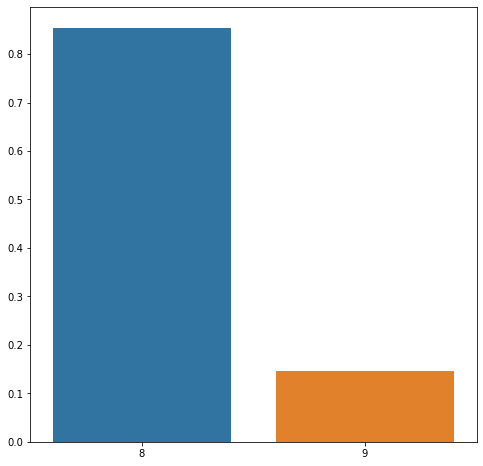

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x=gummies_per_pack.index,y=gummies_per_pack.values);